# Routeberekening met A*

Routeberekening wordt nog steeds gezien als een probleem in de informatica. De kortste route tussen twee punten en een lading obstakels is niet in lineaire tijd op te lossen. Routeberekening is zelfs zo'n groot probleem dat we niet eens de complexiteit van een routeplanningsalgoritme kunnen meten. We kunnen zulke algoritmes dus niet eens een 'Big O notation' toekennen. Die hangt maar net af van welke berekeningen je gebruikt en wat je omgeving is.

De simpelste manier om een route te zoeken is met 'breadth first search'. Hier zijn allerlei varianten op, maar het originele algoritme staat in de routeplanning bekend als Dijkstra's algoritme. Dijkstra's algoritme is het enige routeplanningsalgoritme dat altijd de kortste route vindt.

In deze notebook leg ik stukje bij beetje uit wat routeplanning is hoe een routeplanningsalgoritme werkt, hoe we dit kunnen verbeteren tot het A* algoritme en wat de verschillen zijn. Dit doe ik aan de hand van interactieve voorbeelden met mijn eigen module `pathfinder`. Deze module is te vinden in het script `pathfinder.py`: dit is het script waar ik het volledige algoritme heb geïmplementeerd. Raadpleeg dit script als je op zoek bent naar meer informatie over de module `pathfinder`.

## BFS en DFS
Voor ik Dijkstra's algoritme uitleg, eerst even wat over BFS en DFS.

BFS staat voor 'Breadth First Search', DFS staat voor 'Depth First Search'. Beide zijn algoritmen om een boomstructuur af te gaan tot het gewenste resultaat in de boom is gevonden. Het grote verschil is de manier waarop de twee algoritmen zoeken.

DFS is de makkelijkste. Je begint bovenaan in de boom en gaat net zo lang linksaf tot je niet verder kan. Bij elke vertakking waar je niet meer verder kan, ga je een stap terug en sluit je die vertakking af: daar ben je al geweest.

BFS is lastiger. Je begint bovenaan in de boom, maar in plaats van elke keer links te gaan, zoek je eerst alle kruispunten waar je heen kan gaan. Deze kruispunten zet je op je lijst. Neem dan elke keer het bovenste kruispunt op je lijst, streep hem af en herhaal het bovenste proces. Blijf dit doen zolang er kruispunten op je lijst staan.

Kijk maar is naar het volgende voorbeeld:

In [1]:
# In de assets bij deze notebook zit een bestand 'searching.py'. Deze importeren we hier:
import searching as search

# Dit is onze boom:
boom = {
    0: {
        1: None,
        8: {
            2: None,
            3: {
                4: None,
                5: None,
                6: None
            },
            7: None
        }
    }
}
# Dit is een dictionary. Elke letter is een kruispunt en heeft een andere dictionary, of is een eindpunt en heeft None. Waar None staat is niks - dat is immers wat None betekent.

We hebben nu twee functies uit ons searching script: `dfs` en `bfs`. Ze voeren het desbetreffende zoekalgoritme uit op een boomstructuur zoals hierboven. Deze functies printen elke letter die ze tegenkomen tijdens het uitvoeren.

In [2]:
# Eerst doen we DFS. We geven aan dat de nummers oplopen tot 26. 
# De output print alle kruispunten die hij tegenkomt in de boomstructuur.
# Probeer de boom maar eens na te lopen op dezelfde volgorde, dan zie je hoe DFS in zijn werk gaat.
search.dfs(boom, 9)

0
1
8
2
3
4
5
6
7


In [3]:
# Nu doen we BFS. Hier geldt weer hetzelfde: loop de boom maar eens na in deze volgorde, dan zie je hoe BFS werkt.
search.bfs(boom, 9)

0
1
8
2
3
7
4
5
6


Je ziet dat DFS eigenlijk de boom van boven naar beneden volgt, terwijl BFS de boom van links naar rechts volgt.

DFS is niet zo handig in routeplanning omdat de boomstructuur eindeloos diep kan gaan. Stel je voor dat je linksaf gaat en hier oneindig vaak linksaf kunt gaan, en dat je bestemming simpelweg naar rechts was. Dan zit je in een oneindige loop. Bij BFS zou je altijd je bestemming vinden, ook al is je boom oneindig. Er is alleen 1 voorwaarde: je bestemming moet bereikbaar zijn.

## BFS in routeplanning
De originele BFS wordt gebruikt in Dijkstra's algoritme. Nieuwe kruispunten komen onderaan je lijst, en het kruispunt bovenaan je lijst is het kruispunt waar je als eerste gaat zoeken. Het doel hiervan is om zo dicht mogelijk bij je startpunt te blijven. Hieronder een animatie van Dijkstra's algoritme aan de hand van IPython. Gebruik `SHIFT`+`ENTER` om het uit te voeren.

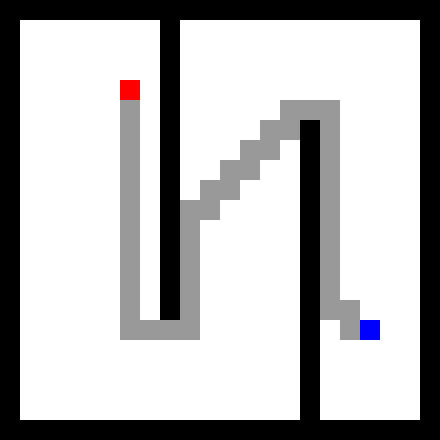

Finished after 341 iterations.


In [4]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak twee muren ...
    grid.setCell(7, i, 0)         # ... 1 van boven ...
    grid.setCell(14, 19-i, 0)     # ... en 1 van onder

pathfinder = Pathfinder(grid, (5, 3)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (5, 3)
pathfinder.addEndpoint(17, 15)        # We voegen 1 eindpunt toe: (17, 15)

# Deze functie is belangrijk omdat we Dijkstra's algoritme willen maken (standaard is ons uiteindelijke A*)
# Deze functie berekent een waarde die de routeplanner zo laag mogelijk probeert te houden
# Straks meer hierover
def dijkstra(traveled, remaining):
    return traveled # 'traveled' is de lengte van de afgelegde route: deze moet zo laag mogelijk blijven

pathfinder.weightCalculator = dijkstra # Laat de pathfinder Dijkstra's algoritme gebruiken

# Deze functie toont een duidelijke animatie van hoe Dijkstra's algoritme de route plant
animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder)

Even wat over de modules in dit script. Naast de module `IPython.display` maken we hier gebruik van de module `pathfinder`. Dit is het bestand `pathfinder.py` in dezelfde map als deze notebook, dit is ook de uiteindelijke implementatie van onze routeplanner. Daarnaast gebruiken we ook een module `ipypathfinder`. Dit is ook respectievelijk het bestand `ipypathfinder.py`. Deze module biedt de mogelijkheid om het het algoritme weer te geven in een plaatje. Als je meer wil weten over wat deze modules inhouden: zie de twee bijbehorende bestanden.

Je zag tijdens het rekenen rode en blauwe vakjes verschijnen. Denk nog eens aan die lijst bij het BFS algoritme: alle blauwe vakjes staan op deze lijst. Alle rode vakjes staan ook op de lijst, maar zijn afgestreept. In het algoritme hebben de afgestreepte hokjes een aparte lijst: de closed list. Deze hokjes hoeven we niet meer op terug te komen: hier zijn we geweest en we weten dat we hier niet meer terug hoeven te komen. De andere lijst - die met de niet afgestreepte hokjes - is de open list. Dit zijn de hokjes die we nog moeten inspecteren.

## Het algoritme
We gebruiken dus twee lijsten in het algoritme: de _open list_ en de _closed list_. Eerst voegen we het startpunt toe aan de _open list_. Vervolgens herhalen we de volgende stappen net zo lang tot het eindpunt zich in de _open list_ bevindt, of tot de open list leeg is:

1. Neem en verwijder het bovenste item in de _open list_.
2. Voeg deze node toe aan de _closed list_.
3. Voor elke buurcel:
   1. Staat deze cel in de _closed list_ of de _open list_? Doe dan niks.
   2. Voeg deze cel onderaan de _open list_ toe en verwijs deze cel naar de cel die je net hebt toegevoegd aan de _closed list_.


We kunnen dit ook weergeven in een finite state diagram:

![1](astar.png)

We zien hier drie mogelijke toestanden: _q1_, _q2_ en _q3_. De entry point is _q1_. In _q1_ verplaatsen we de bovenste node in de _open list_ naar de _closed list_ en updaten we alle cellen daaromheen. Er zijn nu twee condities: `end in openList` en `len(openList) == 0`. We spreken van de eerste conditie, `end in openList`, als onze bestemming in de _open list_ staat. In dit geval gaan we naar _q3_ en zitten we in een eindtoestand. We spreken van de tweede conditie, `len(openList) == 0`, als er geen items meer in de _open list_ staan. In dit geval gaan we naar _q2_ en zitten we ook in een eindtoestand. Er is nog een andere conditie: `λ` (lambda). Bij `λ` spreken we eigenlijk van de conditie `True`: we volgen deze conditie hoe dan ook. De andere twee condities zijn automatisch leidend, omdat deze tot een eindtoestand leid en. Als er geen eindtoestand is blijven we in _q1_ en herhalen we het hele proces.

Kun je nu niet gewoon _q2_ en _q3_ samenvoegen? Het antwoord is: nee. De verschillende eindtoestanden zijn namelijk bepalend voor of er een route is gevonden of niet.

- In _q2_ zijn er geen items meer in de _open list_. De bestemming staat dus ook niet in onze _open list_, en we kunnen nergens meer heen. Kortom: er is geen route gevonden.
- In _q3_ staat de bestemming in de _open list_. We hoeven nergens anders meer heen om te redeneren dat onze route bepaald is. In dit geval moeten we nog 1 ding doen: we moeten de route vinden door simpelweg terug te lopen naar het begin. Teruglopen naar het begin is niet zo moeilijk omdat je bij elke node hebt onthouden vanaf welke node je er bent gekomen: je volgt deze nodes terug tot aan je startpunt en noteert de route die je hierbij loopt. Deze route zet je vervolgens andersom en tada: dit is je berekende route!

Laten we het bekijken in python:

In [5]:
def isWall(coords): # We simuleren hiermee ongeveer dezelfde omgeving als in de bovenstaande animatie.
    (x, y) = coords
    
    # Als we buiten de regio [1, 1, 21, 21] vallen, dan is er een muur
    if(x < 1 or x >= 21 or y < 1 or y >= 21):
        return True
    
    # Een muur loopt op x = 8 vanaf boven
    if(x == 8 and y < 16):
        return True
    
    # Een muur loopt op x = 15 vanaf onder
    if(x == 15 and y >= 6):
        return True
    
    return False

def pathfind(start, end):
    if(start == end): return [start] # Special case: we hoeven hier niet moeilijk voor te doen
    
    # We bewaren de mogelijke beweegrichtingen in een tuple zodat we ze kunnen nalopen met een for-loop
    moveDirections = ((-1, 0), (1, 0), (0, -1), (0, 1))

    openList = []
    closedList = []

    # Hierin houden we bij welke coordinaten kant we op moeten om de route terug te volgen naar de start
    parents = {}

    openList.append(start)

    while(True): # True = λ
        # q1

        # Verplaats de eerste node in de open list naar de closed list
        node = openList[0]
        del openList[0]
        closedList.append(node)

        # Voeg nodige cellen toe aan de open list
        for direction in moveDirections:
            neighbor = (node[0] + direction[0], node[1] + direction[1])

            # Drie condities voorkomen dat de buurcel in de open list komt
            # - Hij staat al in de open list
            # - Hij staat in de closed list
            # - De buurcel is in een muur
            if(neighbor in closedList or neighbor in openList or isWall(neighbor)):
                continue # Skip deze buurcel

            # Voeg de buurcel toe aan de open list
            openList.append(neighbor)

            # Onthoud waar we vandaan kwamen
            parents[neighbor] = node

        if(len(openList) == 0):
            return None # q2: er is geen route

        if(end in openList):
            # q3: volg de route terug naar het begin
            path = []
            last = end
            while(last in parents):
                path.insert(0, last) # Voeg toe aan het begin van de lijst: je loopt immers terug naar het begin
                last = parents[last]

            path.insert(0, start) # Voeg je startpunt toe aan de lijst: de bestemming staat er immers ook in
            return path # Tada: onze route!
        
        
start = (6, 4) # Ons beginpunt
end = (18, 16) # Ons eindpunt

path = pathfind(start, end) # Bereken onze route

print(path) # Print onze route in de console

[(6, 4), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (8, 16), (9, 16), (10, 16), (11, 16), (12, 16), (13, 16), (14, 16), (14, 15), (14, 14), (14, 13), (14, 12), (14, 11), (14, 10), (14, 9), (14, 8), (14, 7), (14, 6), (14, 5), (15, 5), (16, 5), (17, 5), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (18, 15), (18, 16)]


Merk op dat we hier gebruik maken van een _open list_ (`openList`) en een _closed list_ (`closedList`). Daarnaast hebben we de dictionary `parents`. In deze dictionary onthouden we hoe we terug moeten lopen door coordinaten die we aan de _open list_ hebben toegevoegd te mappen met de node die we toen daarvoor in de _closed list_ hebben gezet. Kortom: elke key in deze dictionary verwijst naar een andere key in de dictionary, en die weer naar een ander, en die ook weer naar een ander, enzovoort tot een key verwijst naar het startpunt. Deze informatie gebruiken we zodra we in toestand _q3_ komen.

We zien als output een rare lijst met coordinaten. Maar loop deze coordinaten na en je zult zien dat het algoritme je keurig om de obstakels heeft heen geleid. We renderen het met IPython om dit te visualiseren:

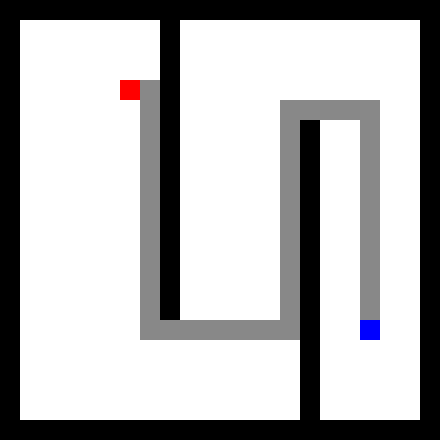

In [6]:
from IPython.display import display
from ipypathfinder import IPGrid

def renderPath(path): # We maken een functie zodat we deze later in de notebook kunnen hergebruiken.
    grid = IPGrid(22, 22, 20)

    for x in range(22):
        for y in range(22):
            if(isWall((x, y))):
                grid.setCell(x, y, "#000") # '#000' is de kleurcode voor zwart: teken muurtjes zwart

    for coords in path:
        (x, y) = coords
        grid.setCell(x, y, "#888") # '#888' = grijs: teken het pad grijs

    grid.setCell(start[0], start[1], "#f00") # '#f00' = rood: teken het startpunt rood
    grid.setCell(end[0], end[1], "#00f") # '#00f' = blauw: teken het eindpunt blauw

    display(grid)
    
renderPath(path)

Zoals je ziet hebben we heel simpel Dijkstra's algoritme weten te implementeren! We hebben immers onze route berekend. Maar er is een groot nadeel aan Dijkstra's algoritme. We kijken nog even terug naar het voorbeeld met de `pathfinder` module:

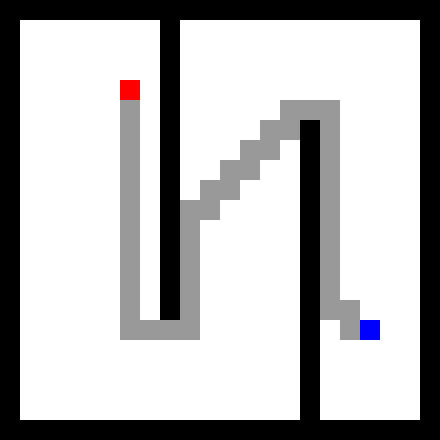

Finished after 341 iterations.


In [7]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak twee muren ...
    grid.setCell(7, i, 0)         # ... 1 van boven ...
    grid.setCell(14, 19-i, 0)     # ... en 1 van onder

pathfinder = Pathfinder(grid, (5, 3)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (5, 3)
pathfinder.addEndpoint(17, 15)        # We voegen 1 eindpunt toe: (17, 15)

# Deze functie is belangrijk omdat we Dijkstra's algoritme willen maken (standaard is ons uiteindelijke A*)
# Deze functie berekent een waarde die de routeplanner zo laag mogelijk probeert te houden
# Straks meer hierover
def dijkstra(traveled, remaining):
    return traveled # 'traveled' is de lengte van de afgelegde route: deze moet zo laag mogelijk blijven

pathfinder.weightCalculator = dijkstra # Laat de pathfinder Dijkstra's algoritme gebruiken

animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder)

Het is misschien een andere route, maar het is nog steeds wel Dijkstra's algoritme. De route is alleen net iets anders gekozen. Het maakt in ons geval weinig uit: beide routes zijn even kort: het kortst. Maar kijk nu eens naar de melding eronder. `Finished after 341 iterations.` Deze melding zegt dat Dijkstra's algoritme 341 nodes naar de _closed list_ heeft verplaatst om bij de bestemming te komen. Je ziet dat in de animatie ook echt elke mogelijke route geprobeerd wordt. Zo'n beetje elke cel wordt verplaatst naar de _closed list_: elk lichtrood hokje is in de _closed list_. Eigenlijk is Dijkstra's algoritme dus helemaal niet optimaal. Stel je voor dat we op een moment aankomen waarbij we simpelweg een paar stappen horizontaal en een paar stappen verticaal moeten zetten om bij onze bestemming te komen. Dijkstra's algoritme zoekt dan alsnog in alle richtingen.

Hier is een oplossing voor. Stel je voor dat we aan elke node in de _open list_ een gewicht hangen. Hoe zwaarder het gewicht, hoe dieper een node naar beneden zakt in de _open list_. Hoe zwaar het gewicht is hangt af van een functie. Vervolgens kiezen we elke keer de node met het lichtste gewicht: die drijft immers helemaal naar boven.

## Heuristics
Kijk nog eens naar deze functie:
```python
def dijkstra(traveled, remaining):
    return traveled
```
Deze functie bepaalt eigenlijk het gewicht voor een node: dit is onze _heuristic_. In het voorbeeld geven we deze functie aan de `pathfinder` als `weightCalculator`. We zien dat de functie twee argumenten opgeeft: `traveled` en `remaining`.

- Het argument `traveled` is het de lengte van de route tussen het beginpunt en een desbetreffende node. Deze waarde kunnen we berekenen door terug te lopen naar het begin (zoals we deden aan de hand van onze dictionary met `parents`). In Dijkstra's algoritme is alleen deze waarde belangrijk. Als we alleen deze waarde gebruiken, hoeven we eigenlijk niet onze _open list_ te sorteren: als we dingen toevoegen aan het einde van de _open list_ is de _open list_ automatisch al gesorteerd (daarom konden we in ons eigen voorbeeld de berekening achterwege laten).
- Het argument `remaining` is de lengte van de route tussen de desbetreffende node en het eindpunt. Dit weten we nog niet, want dit is immers wat we moeten berekenen.

Bij Dijkstra's algoritme proberen we dus de route zo kort mogelijk te houden: we houden `traveled` zo laag mogelijk door nodes met een hogere `traveled` waarde pas later te kiezen. Dit gaat echter ten koste aan het kijken of we wel de goede kant op gaan. Laten we nu eens kijken naar hoe het algoritme reageert als we niet `traveled` gebruiken, maar `remaining`. Ofwel: we sturen het algoritme niet om zo dicht mogelijk bij je startpunt te blijven, maar om zo dicht mogelijk bij je eindpunt te komen.

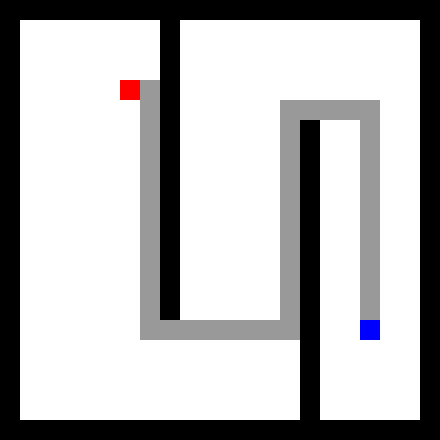

Finished after 132 iterations.


In [8]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak twee muren ...
    grid.setCell(7, i, 0)         # ... 1 van boven ...
    grid.setCell(14, 19-i, 0)     # ... en 1 van onder

pathfinder = Pathfinder(grid, (5, 3)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (5, 3)
pathfinder.addEndpoint(17, 15)        # We voegen 1 eindpunt toe: (17, 15)

# Merk op dat we deze functie nu 'heuristic' hebben genoemd: we gebruiken nu een heuristic die ons naar het einde leidt
def heuristic(traveled, remaining):
    return remaining # 'remaining' stuurt ons richting het eindpunt: daar willen we immers zo snel mogelijk heen

pathfinder.weightCalculator = heuristic # Laat de pathfinder heuristics gebruiken

animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder)

Je ziet nu dat nodes dichter bij het eindpunt eerder gekozen worden dan nodes die je alleen maar verder van het eindpunt leiden. Je ziet dat het algoritme pas gaat zoeken in de omgeving als hij niet meer dichter bij het eindpunt kan komen.
En kijk nu eens naar het aantal _iterations_ in de melding eronder: er zijn, in tegenstelling tot 341 bij Dijkstra's algoritme, maar 132 nodes naar de _closed list_ verplaatst. Dat is een stuk minder: het algortime ging dan ook een stuk sneller. Als je doel is om zo dicht mogelijk bij het eindpunt te blijven om zo het snelst een route te vinden, gebruik je dus `remaining`. Dit is het 'greedy BFS'-algoritme: 'Greedy Breadth First Search'.

De waarde van `remaining` is dus een schatting van de route tussen een node en het eindpunt. Pas als deze schatting niet overeenkomt met de route, gaat het algoritme zoeken. De schatting hoeft helemaal niet moeilijk te zijn. Het voorbeeld gebruikt de 'manhattan distance'. Dat is simpelweg de x-afstand plus de y-afstand:

![2](manhattandistance.png)

In ons geval is de _manhattan distance_ de kortste route tussen A en B, waarbij je alle muren negeert. Zolang deze afstand gelijk is aan de echte afstand tot het eindpunt, zoekt het algoritme dus niet om zich heen en volgt hij gewoon de _manhattan distance_. Uiteraard kun je ook de 'euler distance' gebruiken (rechte lijn), of een andere snelle berekening: hij houdt de uitkomst van deze berekening zo laag mogelijk. Stel dat we Dijkstra's algoritme zouden gebruiken voor deze schatting, dan zou het algoritme niet meer hoeven te zoeken: het volgt direct de route die Dijkstra's algoritme zou berekenen. Dit zou echter veel meer tijd kosten dan gewoon het algoritme zelf te laten zoeken. Maar laten we het toch eens proberen: we gebruiken ons algoritme wat we hierboven geschreven hebben als schatting.

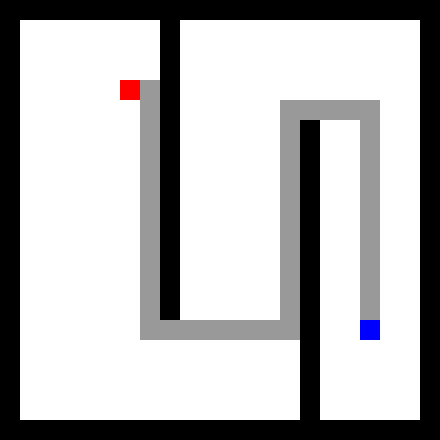

Finished after 46 iterations.


In [9]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak twee muren ...
    grid.setCell(7, i, 0)         # ... 1 van boven ...
    grid.setCell(14, 19-i, 0)     # ... en 1 van onder

pathfinder = Pathfinder(grid, (5, 3)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (5, 3)
pathfinder.addEndpoint(17, 15)        # We voegen 1 eindpunt toe: (17, 15)

# Merk op dat we deze functie nu 'heuristic' hebben genoemd: we gebruiken nu een heuristic die ons naar het einde leidt
def heuristic(traveled, remaining):
    return remaining # 'remaining' stuurt ons richting het eindpunt: daar willen we immers zo snel mogelijk heen

pathfinder.weightCalculator = heuristic # Laat de pathfinder heuristics gebruiken

def estimate(x1, y1, x2, y2): # Deze functie schat de afstand tussen (x1, y1) en (x2, y2)
    return len(pathfind((x1, y1), (x2, y2))) # Laat Dijkstra de afstand schatten met ons algoritme

pathfinder.distanceEstimator = estimate # Gebruik onze functie om de afstand te schatten

animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder)

Je ziet nu dat het algoritme je in een keer naar het eindpunt brengt, ten koste van het feit dat we elke keer als we een node naar de _closed list_ verplaatsen Dijkstra's algoritme uitvoeren. Toch niet zo handig, dus laten we het vanaf nu bij de _manhattan distance_ houden: dat is een veel snellere berekening:

In [10]:
def manhattanDistance(x1, y1, x2, y2):
    return abs(x2 - x1) + abs(y2 - y1) # Abs is de absolute waarde - de modulus: we zorgen dat de afstand altijd positief is

# De manhattan distance van (5, 7) naar (15, 17):
# abs(15 - 5) + abs(17 - 7) = 10 + 10 = 20
print(manhattanDistance(5, 7, 15, 17))

20


Met deze functie kunnen we dus onze heuristic bepalen, waarmee we uiteindelijk de _open list_ sorteren. Toch gaan we niet helemaal sorteren. Integendeel, elke keer als we een node aan de _open list_ toevoegen zetten we hem niet onderaan maar bovenaan, en laten we hem vervolgens naar beneden zinken:

![3](sinking.png)

We mogen hier aannemen dat we te maken hebben met een gesorteerde _open list_. We beginnen met een lege _open list_, en lege lijsten zijn per definitie gesorteerd (er valt immers niks te veranderen). Zolang we de nodes op de juiste plek toevoegen blijft de _open list_ gesorteerd. Hier definieren we een functie voor:

In [11]:
# - nodeList:   de lijst waar we een node aan toevoegen
# - node:       de node die we willen toevoegen
# - heuristic:  de heuristic-waarden van alle nodes: dit is een dictionary die voor elke node een heuristic onthoudt
def addAndSink(nodeList, node, heuristics):
    index = 0
    
    # Deze waarden berekenen we buiten de loop, anders worden ze elke keer opnieuw berekend, ondanks dat ze niet veranderd zijn
    nodeHeuristic = heuristics[node]
    length = len(nodeList)
    
    # Zoek de index van de eerste node met een hogere heuristic
    # Houd rekening met het feit dat we de index kleiner houden dan de lengte van de lijst, anders
    # geeft python namelijk een error (dan is onze index 'out of bounds' -> buiten de lijst)
    while(index < length and heuristics[nodeList[index]] < nodeHeuristic):
        index += 1
        
    # De index is nu de plek in de lijst waar we de node moeten toevoegen.
    # Mocten we geen node in nodeList hebben gevonden met een heuristic groter dan die van ons, dan is onze
    # index nu automatisch gelijk aan de lengte van de lijst: we voegen dan een item to aan het einde van
    # de lijst.
    nodeList.insert(index, node)

Nu hoeven we alleen nog maar ons pathfinding algoritme aan te passen en te zorgen dat we deze functie gebruiken. Hiervoor maken we een andere dictionary `heuristics` waar we de heuristic-waarden van elke node in zetten. Deze willen we immers niet elke keer berekenen. Vervolgens gebruiken we `addAndSink` om nieuwe nodes aan de _open list_ toe te voegen, in plaats van `openList.append`.

Finished in 123 iterations.


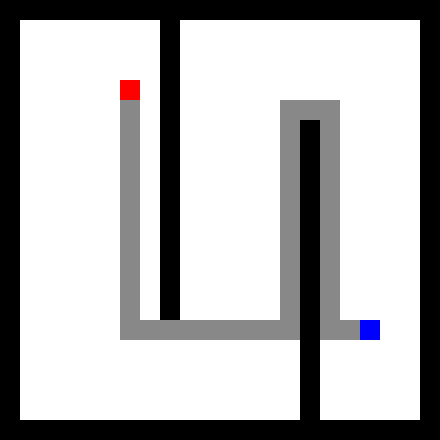

In [12]:
def heuristic(node, end):
    return manhattanDistance(node[0], node[1], end[0], end[1])

# Pathfinding met Greedy Breadth First Search (GBFS) in plaats van Dijkstra's algoritme
def pathfindGBFS(start, end, heuristicFn):
    if(start == end): return [start] # Special case: we hoeven hier niet moeilijk voor te doen
    
    # We bewaren de mogelijke beweegrichtingen in een tuple zodat we ze kunnen nalopen met een for-loop
    moveDirections = ((-1, 0), (1, 0), (0, -1), (0, 1))
    
    iterations = 0 # We tellen hoeveel iteraties we nodig hebben om bij het eindpunt te komen

    openList = []
    closedList = []

    # Hierin houden we bij welke coordinaten kant we op moeten om de route terug te volgen naar de start
    parents = {}
    
    # Hierin houden we de heuristic van elke node bij
    heuristics = {}

    openList.append(start) # Er staat nog niks in de open list dus we kunnen hoe dan ook append gebruiken
                           # De list blijft zo gesorteerd: ook bij 1 item valt er immers weinig te sorteren
    
    # Bereken de heuristic van 'start' en voeg deze toe aan 'heuristics'
    heuristics[start] = heuristicFn(start, end)

    while(True): # True = λ
        # q1
        
        iterations += 1 # Dit is 1 iteratie

        # Verplaats de eerste node in de open list naar de closed list
        node = openList[0]
        del openList[0]
        closedList.append(node)

        # Voeg nodige cellen toe aan de open list
        for direction in moveDirections:
            neighbor = (node[0] + direction[0], node[1] + direction[1])

            # Drie condities voorkomen dat de buurcel in de open list komt
            # - Hij staat al in de open list
            # - Hij staat in de closed list
            # - De buurcel is in een muur
            if(neighbor in closedList or neighbor in openList or isWall(neighbor)):
                continue # Skip deze buurcel
                
            # Bereken de heuristic van 'neighbor' en voeg deze toe aan 'heuristics'
            heuristics[neighbor] = heuristicFn(neighbor, end)

            # Voeg de buurcel toe aan de open list, gebruik hiervoor 'addAndSink'
            addAndSink(openList, neighbor, heuristics)

            # Onthoud waar we vandaan kwamen
            parents[neighbor] = node

        if(len(openList) == 0):
            return None # q2: er is geen route

        if(end in openList):
            # q3: volg de route terug naar het begin
            path = []
            last = end
            while(last in parents):
                path.insert(0, last) # Voeg toe aan het begin van de lijst: je loopt immers terug naar het begin
                last = parents[last]

            path.insert(0, start) # Voeg je startpunt toe aan de lijst: de bestemming staat er immers ook in
            
            print("Finished in " + str(iterations) + " iterations.")
            return path # Tada: onze route!
        
path = pathfindGBFS(start, end, heuristic) # Bereken onze route met 'heuristic' om onze heuristics te berekenen
renderPath(path)

We hebben nu ook ons aantal iteraties geprint voordat we het path renderden. Het zijn er klaarblijkelijk nog minder dan bij de `pathfinder` module. Wil dit nou zeggen dat we een nog optimaler pathfinder algoritme hebben gemaakt? Het antwoord is nee. We nemen even een ander grid en gebruiken GBFS om de route te berekenen:

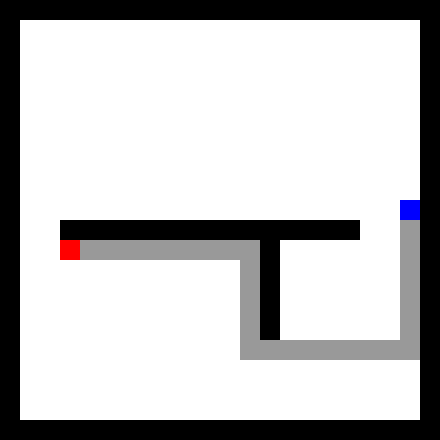

Finished after 37 iterations.


In [13]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak een horizontale muur
    grid.setCell(2 + i, 10, 0)
    
for i in range(6):                # Maak een verticale muur
    grid.setCell(12, 10 + i, 0)   # We hebben nu een soort T

pathfinder2 = Pathfinder(grid, (2, 11)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (2, 11)
pathfinder2.addEndpoint(19, 9)          # We voegen 1 eindpunt toe: (19, 9)

def heuristic(traveled, remaining):
    return remaining # 'remaining' stuurt ons richting het eindpunt: daar willen we immers zo snel mogelijk heen

pathfinder2.weightCalculator = heuristic # Laat de pathfinder heuristics gebruiken

animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder2)

Wat zien we nu? We zien hem nog steeds de route van het begin naar het eind vinden. Maar we zien ook dat er een snellere route is:

![4](fasterroute.png)

De lichtrode route is onze route. De lichtgroene route is de snelste route. Dijkstra's algoritme zou de groene route gekozen hebben, die kiest immers altijd de snelste. GBFS-routeplanning zoekt dus niet de snelste route, maar de snelste berekening. En dat zie je in de functie `heuristic`: het maakt GBFS namelijk helemaal niet uit wat de waarde is van `traveled`, we gebruiken alleen `remaining`. We zitten nu in een dilemma: willen we de kortste route, of willen we de snelste berekening? Gelukkig is er een compromis. Wat als we `traveled` en `remaining` bij elkaar zouden optellen en hiermee onze heuristic berekenen. We verdelen dan onze prioriteit over een snellere route en een snellere berekening:

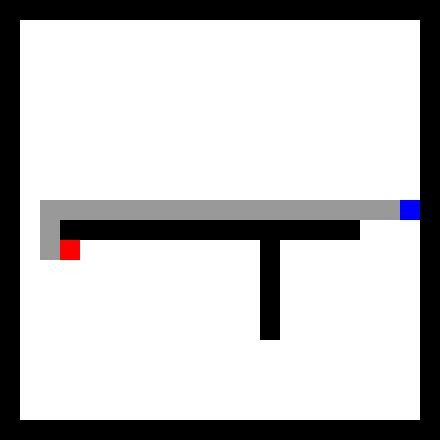

Finished after 38 iterations.


In [14]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak een horizontale muur
    grid.setCell(2 + i, 10, 0)
    
for i in range(6):                # Maak een verticale muur
    grid.setCell(12, 10 + i, 0)   # We hebben nu een soort T

pathfinder2 = Pathfinder(grid, (2, 11)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (2, 11)
pathfinder2.addEndpoint(19, 9)          # We voegen 1 eindpunt toe: (19, 9)

def heuristic(traveled, remaining):
    return traveled + remaining

pathfinder2.weightCalculator = heuristic # Laat de pathfinder heuristics gebruiken

animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder2)

Je kunt dus je prioriteiten verdelen over de kortste route of de snelste berekening. In dit geval hebben we ze fifty-fifty verdeeld: er gaat evenveel prioriteit naar een korte route als naar een snellere berekening. Hiermee hebben we de kortste route gevonden in slecths 1 extra iteratie. Dit is A*!

## A* implementeren
We hoeven dus alleen maar onze heuristic aan te passen om van GBFS naar A* te gaan. Toch zullen we iets moeten veranderen in onze pathfinding-code:
```python
# Drie condities voorkomen dat de buurcel in de open list komt
# - Hij staat al in de open list
# - Hij staat in de closed list
# - De buurcel is in een muur
if(neighbor in closedList or neighbor in openList or isWall(neighbor)):
    continue # Skip deze buurcel
```
Het kan voorkomen dat we een cel in de _open list_ skippen terwijl we de heuristic van deze cel kunnen verlagen. We moeten dus deze conditie opsplitsen in twee delen. In geval 1 staat de buurcel als node in de _closed list_ of is het een muur. In dit geval mogen we de cel skippen: `continue`. In het geval 2 staat de buurcel in de _open list_. Op dat moment moeten we wat extra's doen: we moeten de afgelegde afstand van de parent van deze buurecel (kijk hiervoor in `parents`) gaan vergelijken met de afgelgde afstand van de nieuwe _closed list_ node. Als onze nieuwe _closed list_ node een kleinere afstand heeft afgelegd dan de oude parent, veranderen we de parent van de _open list_ node naar onze nieuwe _closed list_ node. Daarna mogen we alsnog de buurcel skippen: `continue`. Dus onze code wordt veranderd naar:
```python
# Twee condities voorkomen dat de buurcel in de open list komt
# - Hij staat in de closed list
# - De buurcel is in een muur
if(neighbor in closedList or isWall(neighbor)):
    continue # Skip deze buurcel
    
# Als we al in de open list staan, vergelijk onze afgelegde afstanden
# Merk op dat 'node' onze nieuwe closed list node is
if(neighbor in openList):
    parent = parents[neighbor]
    
    if(traveledDists[parent] > traveledDists[node]): # Vergelijk de afgelegde afstanden van de parent en 'node'
        parents[neighbor] = node                     # Update onze parent
        newDist = traveledDists[node] + 1            # Update de afgelegde afstand van 'neighbor'
        traveledDists[neighbor] = newDist            # Update daarbij ook onze heuristic
        heuristics[neighbor] = heuristicFn(neighbor, newDist, end)
    
    continue # Skip verder deze cel
    
# ... (Maak de nieuwe open list cel etc...)
```
Merk op dat onze heuristic functie de afgelegde afstand nu als parameter vraagt. Merk ook op dat we weer een nieuwe dictionary hebben waarin we de lengte van de route tussen start en een node bewaren: `traveledDists`. Afgelegde afstanden worden berekend door de afgelegde afstand te nemen en er 1 bij op te tellen. Het startpunt heeft geen parent. In dit geval gebruiken we 0 als afgelegde afstand, de afstand van het startpunt tot het startpunt is immers 0. We moeten dus elke keer als we de afgelegde afstand willen berekenen gaan backtracen, net als in toestand _q3_. Dit kost veel werk, zeker in extreme situaties. Daarom bewaren we deze waarden in een dictionary `traveledDists`. Als we dan een afgelegde afstand van een node willen weten, kijken we gewoon in `traveledDists`.

Finished in 250 iterations.


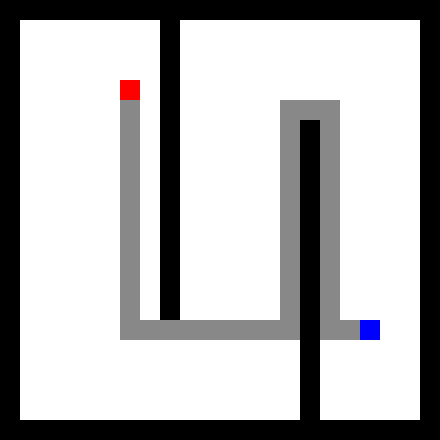

In [15]:
def heuristicAStar(node, traveledDist, end):
    return traveledDist + manhattanDistance(node[0], node[1], end[0], end[1])

# Pathfinding met Greedy Breadth First Search (GBFS) in plaats van Dijkstra's algoritme
def pathfindAStar(start, end, heuristicFn):
    if(start == end): return [start] # Special case: we hoeven hier niet moeilijk voor te doen
    
    # We bewaren de mogelijke beweegrichtingen in een tuple zodat we ze kunnen nalopen met een for-loop
    moveDirections = ((-1, 0), (1, 0), (0, -1), (0, 1))
    
    iterations = 0 # We tellen hoeveel iteraties we nodig hebben om bij het eindpunt te komen

    openList = []
    closedList = []

    # Hierin houden we bij welke coordinaten kant we op moeten om de route terug te volgen naar de start
    parents = {}
    
    # Hierin houden we de heuristic van elke node bij
    heuristics = {}
    
    # Hierin houden we de afgelegde afstanden van elke node bij
    traveledDists = {}

    openList.append(start) # Er staat nog niks in de open list dus we kunnen hoe dan ook append gebruiken
                           # De list blijft zo gesorteerd: ook bij 1 item valt er immers weinig te sorteren
    
    # Bereken de heuristic van 'start' en voeg deze toe aan 'heuristics'
    heuristics[start] = heuristicFn(start, 0, end)
    
    traveledDists[start] = 0 # De afgelegde afstand van start naar start is simpelweg 0

    while(True): # True = λ
        # q1
        
        iterations += 1 # Dit is 1 iteratie

        # Verplaats de eerste node in de open list naar de closed list
        node = openList[0]
        del openList[0]
        closedList.append(node)
        
        dist = traveledDists[node] # Bewaar deze in een variable: we gebruiken hem best wel vaak
        nextDist = dist + 1        # Zelfde geldt hiervoor

        # Voeg nodige cellen toe aan de open list
        for direction in moveDirections:
            neighbor = (node[0] + direction[0], node[1] + direction[1])

            # Twee condities voorkomen dat de buurcel in de open list komt
            # - Hij staat in de closed list
            # - De buurcel is in een muur
            if(neighbor in closedList or isWall(neighbor)):
                continue # Skip deze buurcel

            # Als we al in de open list staan, vergelijk onze afgelegde afstanden
            # Merk op dat 'node' onze nieuwe closed list node is
            if(neighbor in openList):
                parent = parents[neighbor]

                if(traveledDists[parent] > dist):                # Vergelijk de afgelegde afstanden van de parent en 'node'
                    parents[neighbor] = node                     # Update onze parent
                    traveledDists[neighbor] = nextDist           # Update de afgelegde afstand van 'neighbor'
                    heuristics[neighbor] = heuristicFn(neighbor, nextDist, end) # Update onze heuristic

                continue # Skip verder deze cel
                
            # Bereken de afgelegde afstand van 'neighbor' en voeg deze toe aan 'traveledDists'
            traveledDists[neighbor] = nextDist
            
            # Bereken de heuristic van 'neighbor' en voeg deze toe aan 'heuristics'
            heuristics[neighbor] = heuristicFn(neighbor, nextDist, end)

            # Voeg de buurcel toe aan de open list, gebruik hiervoor 'addAndSink'
            addAndSink(openList, neighbor, heuristics)

            # Onthoud waar we vandaan kwamen
            parents[neighbor] = node

        if(len(openList) == 0):
            return None # q2: er is geen route

        if(end in openList):
            # q3: volg de route terug naar het begin
            path = []
            last = end
            while(last in parents):
                path.insert(0, last) # Voeg toe aan het begin van de lijst: je loopt immers terug naar het begin
                last = parents[last]

            path.insert(0, start) # Voeg je startpunt toe aan de lijst: de bestemming staat er immers ook in
            
            print("Finished in " + str(iterations) + " iterations.")
            return path # Tada: onze route!
        
path = pathfindAStar(start, end, heuristicAStar) # Bereken onze route met 'heuristic' om onze heuristics te berekenen
renderPath(path)

Er lijkt misschien niks veranderd te zijn. Het aantal iteraties is alleen maar meer geworden... Dit komt omdat GBFS in de situatie hierboven ook de kortste route vindt. A* verandert niks. Toch is A* wel beter. Met A* kun je namelijk zelf kiezen in hoeverre de heuristic de afgelegde afstand weegt tot de schatting van de nog af te leggen afstand. Hoe meer je de afgelegde afstand meeweegt, hoe optimaler je routes maar hoe langzamer het algoritme. Hoe meer je de geschatte afstand meeweegt, hoe sneller het algoritme maar hoe minder optimaal je routes. Die keuze is aan jou, net als je schattingsfunctie. Speel maar eens met de `heuristic` functie en kijk wat er gebeurt:

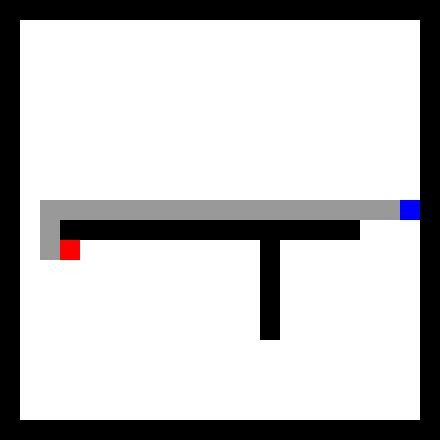

Finished after 53 iterations.


In [16]:
from pathfinder import *    # Importeer onze pathfinder module, hieronder meer daarover
from ipypathfinder import * # Importeer onze ipypathfinder module, hieronder meer daarover

grid = LimitedGrid(0, 0, 20, 20)  # Maak een grid in de rechthoek [0, 0, 20, 20] ([x, y, breedte, hoogte]). Alles buiten deze rechthoek wordt gezien als muur.
for i in range(15):               # Maak een horizontale muur
    grid.setCell(2 + i, 10, 0)
    
for i in range(6):                # Maak een verticale muur
    grid.setCell(12, 10 + i, 0)   # We hebben nu een soort T

pathfinder2 = Pathfinder(grid, (2, 11)) # Maak een Pathfinder object (uit de module 'pathfinder'), we beginnen op (2, 11)
pathfinder2.addEndpoint(19, 9)          # We voegen 1 eindpunt toe: (19, 9)

def heuristic(traveled, remaining):
    return 2 * traveled + 5 * remaining # Een weging van 2 op 5: de afgelegde afstand weegt 2 keer mee en de geschatte overige afstand weegt 5 keer mee

pathfinder2.weightCalculator = heuristic # Laat de pathfinder heuristics gebruiken

animatedPathfindAndDisplay(-1, -1, 22, 22, grid, pathfinder2)

Die weging kun je ook maken in onze eigen heuristic functie:

Finished in 214 iterations.


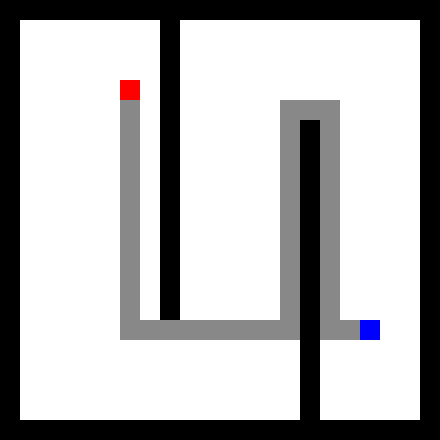

In [17]:
def heuristicAStarWeighted(node, traveledDist, end): # Zie ook hier de weging van 2 op 5
    return 2 * traveledDist + 5 * manhattanDistance(node[0], node[1], end[0], end[1])

path = pathfindAStar(start, end, heuristicAStarWeighted)
renderPath(path)

De uiteindelijke weging is dus aan jou. Het is ook aan jou hoe je je algoritme verder indeelt. In de module `pathfinder` gebruiken we classes en sorteren we niet de _open list_ maar kiezen we de cel met de laagste heuristic.  De parents en de heuristics worden bewaard in instanties van de `Node` class. Sommige dingen gaan in die module dus net iets anders, maar het komt allemaal op hetzelfde neer. Kijk maar eens goed naar het script `pathfinder.py`. Er staat (in het Engels) bij hoe het algoritme is ingedeeld en waarom. Je zult zien dat de algoritmes nagenoeg hetzelfde zijn.

Nog een doolhof om het af te leren:

Finished after 920 iterations:


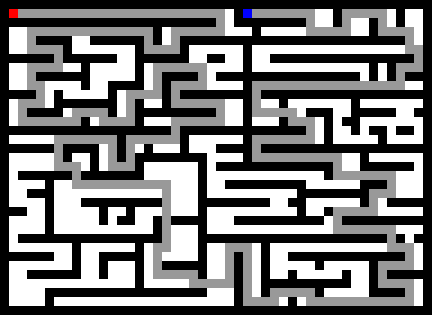

In [1]:
from pathfinder import *
from ipypathfinder import *
from mazegrid import *

grid = createMazeGrid()

pathfinder3 = Pathfinder(grid, (1, 1))
pathfinder3.addEndpoint(27, 1)

def heuristic(traveled, remaining):
    return traveled + remaining

pathfinder3.weightCalculator = heuristic

# Voor een directe berekening, gebruik deze functie:
pathfindAndDisplay(0, 0, grid.w, grid.h, grid, pathfinder3)
# Voor een animatie, gebruik deze functie:
# animatedPathfindAndDisplay(0, 0, grid.w, grid.h, grid, pathfinder3)